In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf

# Tearsheets for Strategy 1, Strategy 2 & Strategy 3

This notebook contains analysis of backtest results from strategies 1, 2 and 3.

Before executing code load the notebook in Quantopian environment.

Here,<br>
Piotroski1 refers to strategy 1, piotroski2 as strategy 2 and so on (as defined in the project working paper 3).<br>
All strategies run are out of sample, i.e., from period Jan 2016 onwards through Jun 30, 2019.<br>
Piotroski3 is fetched twice, first time for out of sample period as described above and second time for combined in and out sample. The reason for fetching Bayesian analysis twice is that we need actual demarkation between in-sample and out sample periods.

Below, for all the strategies a 'full' tearsheet is populated. This full tearsheet could be broken down into following sections:
1. __Performance tearsheet: gives out statistics and viausla pertaining to various performance related measures. The section contains__:
    1. Performance statistics
    2. Performance during worst-drawdown periods
    3. cumulative returns
    4. cumulative volatility
    5. cumulatie log returns
    6. returns
    7. 6 and 12 months rolling beta to benchmark
    8. 6 months rolling volatility
    9. 6 months rolling sharpe
    10. 6 months rolling Fama-French single factor beta
    11. cumulative performance with top five drawdown periods demarkated
    12. monthly returns heatmap, annual returns bar plot, monthly retuns histogram
    13. Daily, weekly & monthly returns box-plot
2. __Stress-period performance__: gives a snapshot of strategy performance during demarkated stress periods. For the backtest period from 2016 onwards through Jun 2019, the market regime is characterized by initial lul followed by volatility, which is shaped by the events like Brexit (fall 2016), Trump election (fall 2017) and US-China trade war (fall 2018 onwards).
    1. Cumulative returns during various demarkated stress periods vis-a-vis the benchmark (SPYV).
3. __positions analysis__:
    1. Top 10 long positions of all times
    2. Top 10 short positions of all time
    3. Top 10 positions of all time
    4. List of all stock positions ever held.
    5. Visualization of Net, long and short exposure levels at all times
    6. Visualization of top 10 positions at all times
    7. Long/ Short max and median position concentration chart
    8. Total holdings
    8. Long & short holdings
    9. Gross leverage
    10. Daily turnover
    11. Daily trading volume
    12. Distribution of daily turnover rates
    13. Distribution of transaction time
    14. Cumulative returns given additional per-dollar slippage
    15. Additional return per dollar of slippage
4. __Factor analysis (performance attribution analysis)__:
    1. summary statistics table indicating strategy specific returns, returns attributed to factors and total returns
    2. Factor analysis table indicating individual factor exposures, annual returns attributed to those factor exposures and returns cumulative 
    3. Cumulative specific returns vs cumulatie common returns and total returns
    4. Cumulative return attributes to various industrial sectors
    5. Cumulative return attributes to various known factors _viz_., size, momentum, value, volatility etc.
    6. Daily return attributes to various industrial sectors
    7. Daily return attributes to various known factors _viz_., size, momentum, value, volatility etc.
    
These visualz are self explanatory and little value addition would occur from our end by commenting on each of them, the important ones being explained in the result and analysis section. Overall, we observe following themes:
1. Number of positions held by our algorithm is very low, so much that idiosyncratic risk is not diversified away completely.
2. Occasionally, leverage exceeds 2x both sides, in all strategy; this needs to be addressed.
3. Addressing the above #1 and #2, we believe, would mitigate most of the performance and risk metric spikes.

Before we begin fetching strategies, we'll first obtain benchmark returns for comparision purposes. The benchmark for our analysis is S&P 500 Value ETF, or SPYV.

In [2]:
benchmark_prices = get_pricing(symbols='SPYV', start_date='2006-01-02', end_date='2015-12-31', handle_missing='ignore', fields='price')
benchmark_return = benchmark_prices.pct_change()[1:]

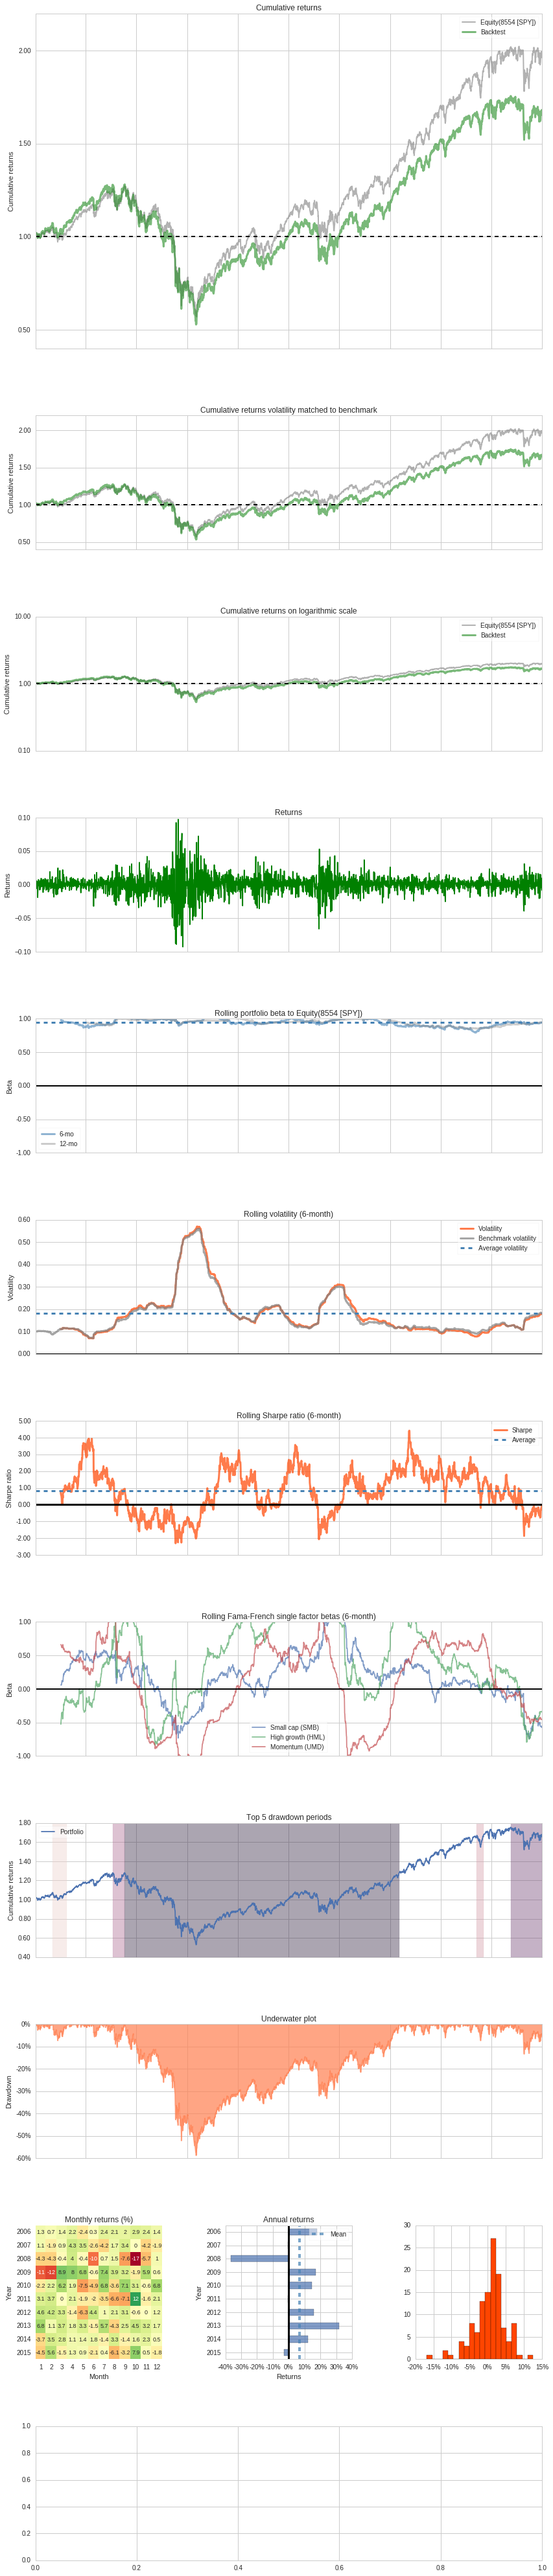

In [3]:
'''Return tearsheet of benchmark returns'''
try:
    pf.create_returns_tear_sheet(returns=benchmark_return, return_fig=True, set_context=True)
except:
    pass

For the out-sample backtests (for all strategies) we assume live trading start from 2019 onwards. This is done only to examine the performance of the recent stress period events.<br>The slippage is assumed to be 0.05%; same as assumed in the algorithm.

In [4]:
piotroski1 = get_backtest('5d74c505682046610ac72562')
piotroski2 = get_backtest('5d74cc453b96ea60bbf72469')
piotroski3 = get_backtest('5d74db8cae911660f2a1dda2')

100% Time:  0:00:02|##########################################################|
100% Time:  0:00:02|##########################################################|
100% Time:  0:00:06|##########################################################|


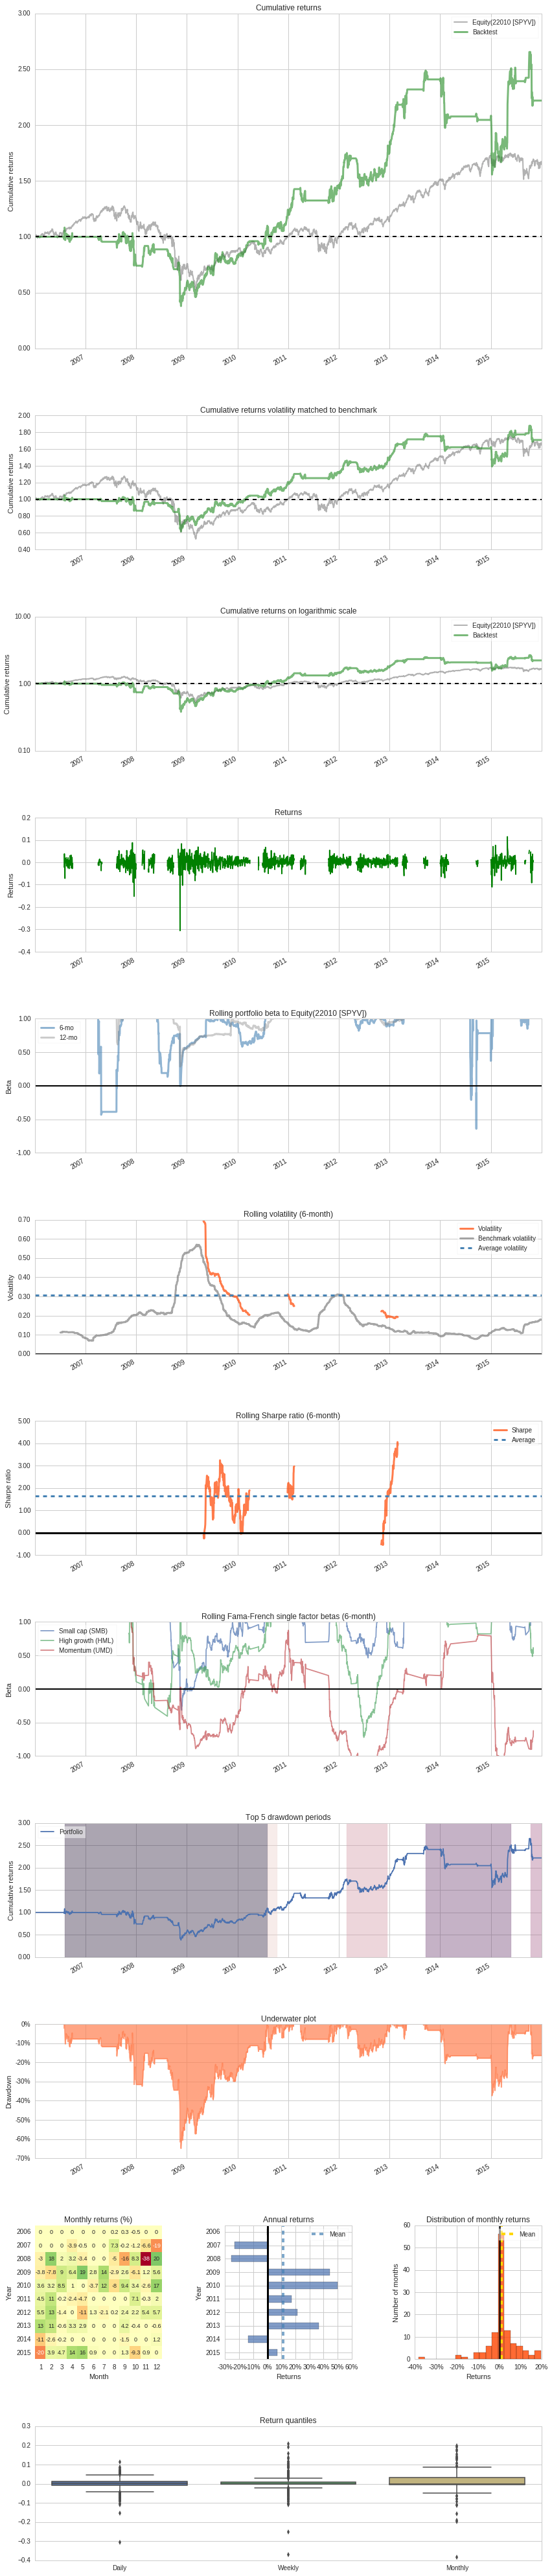

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


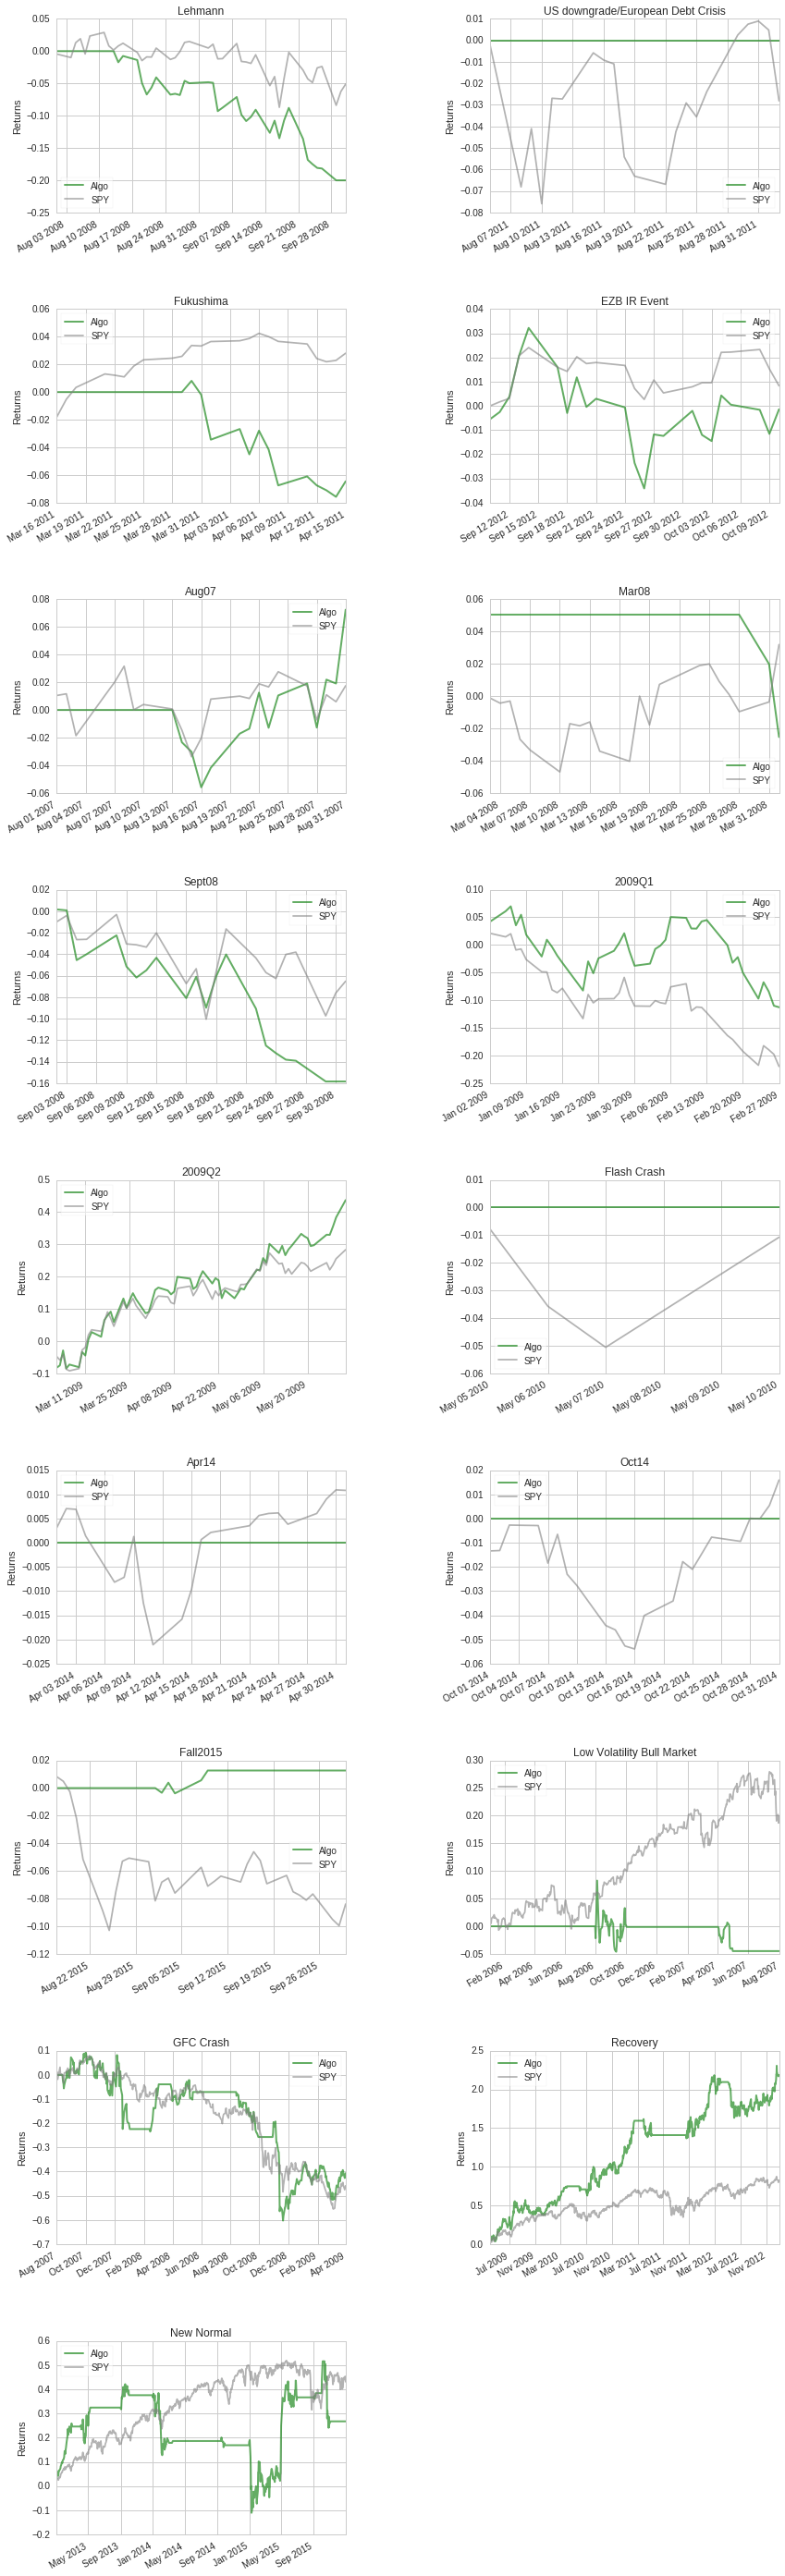

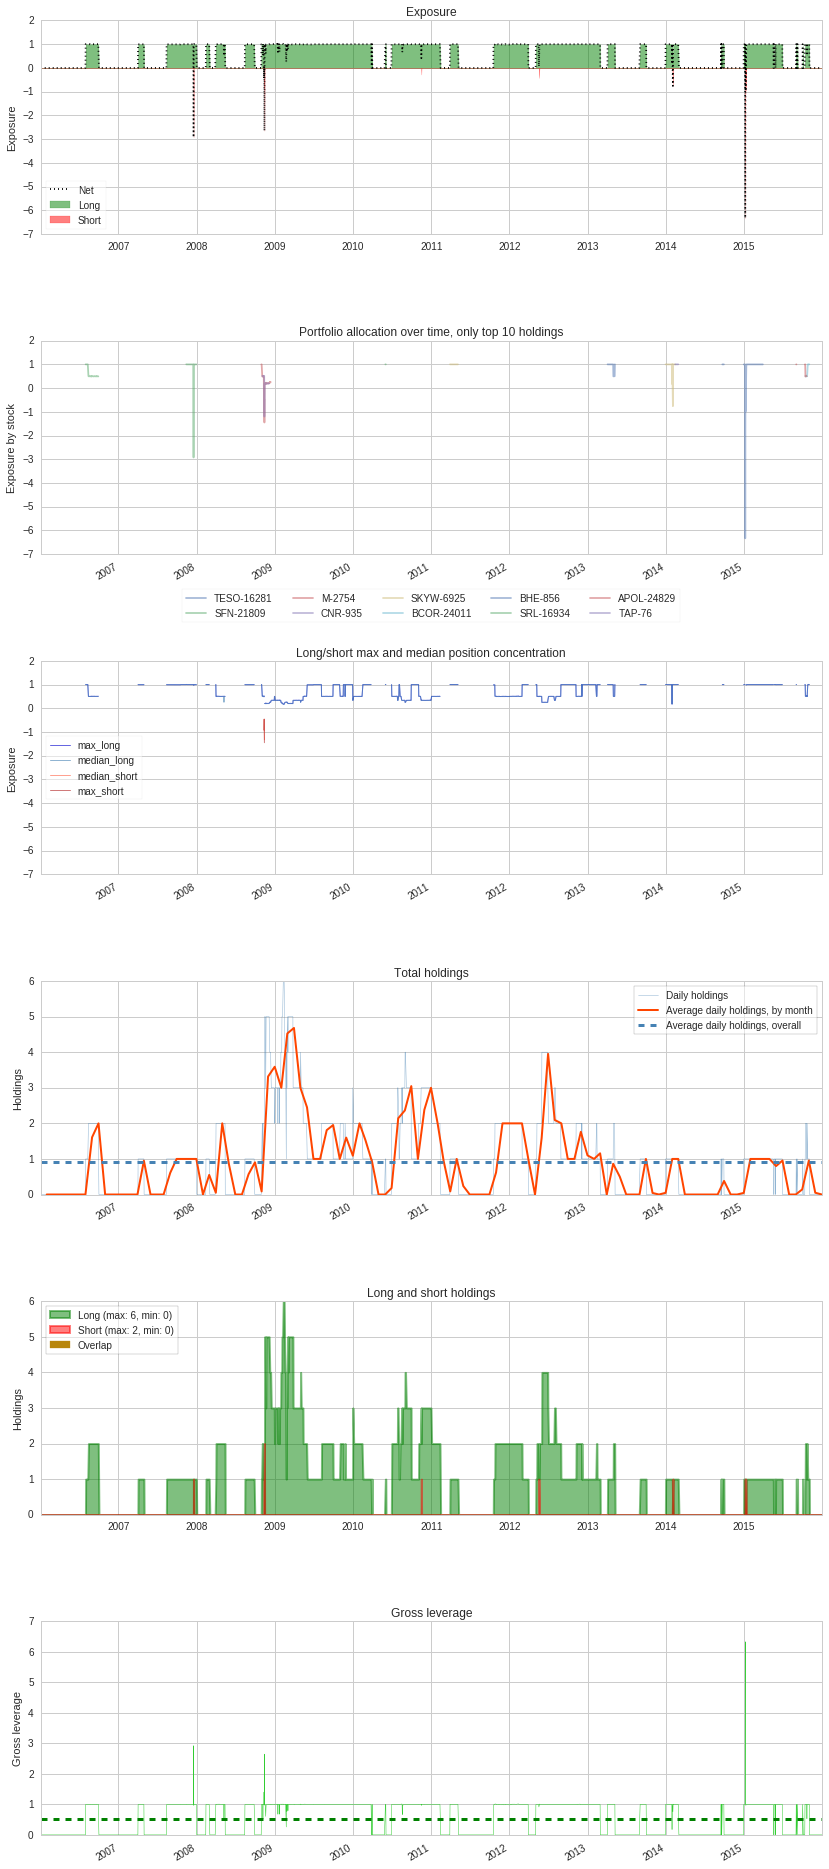

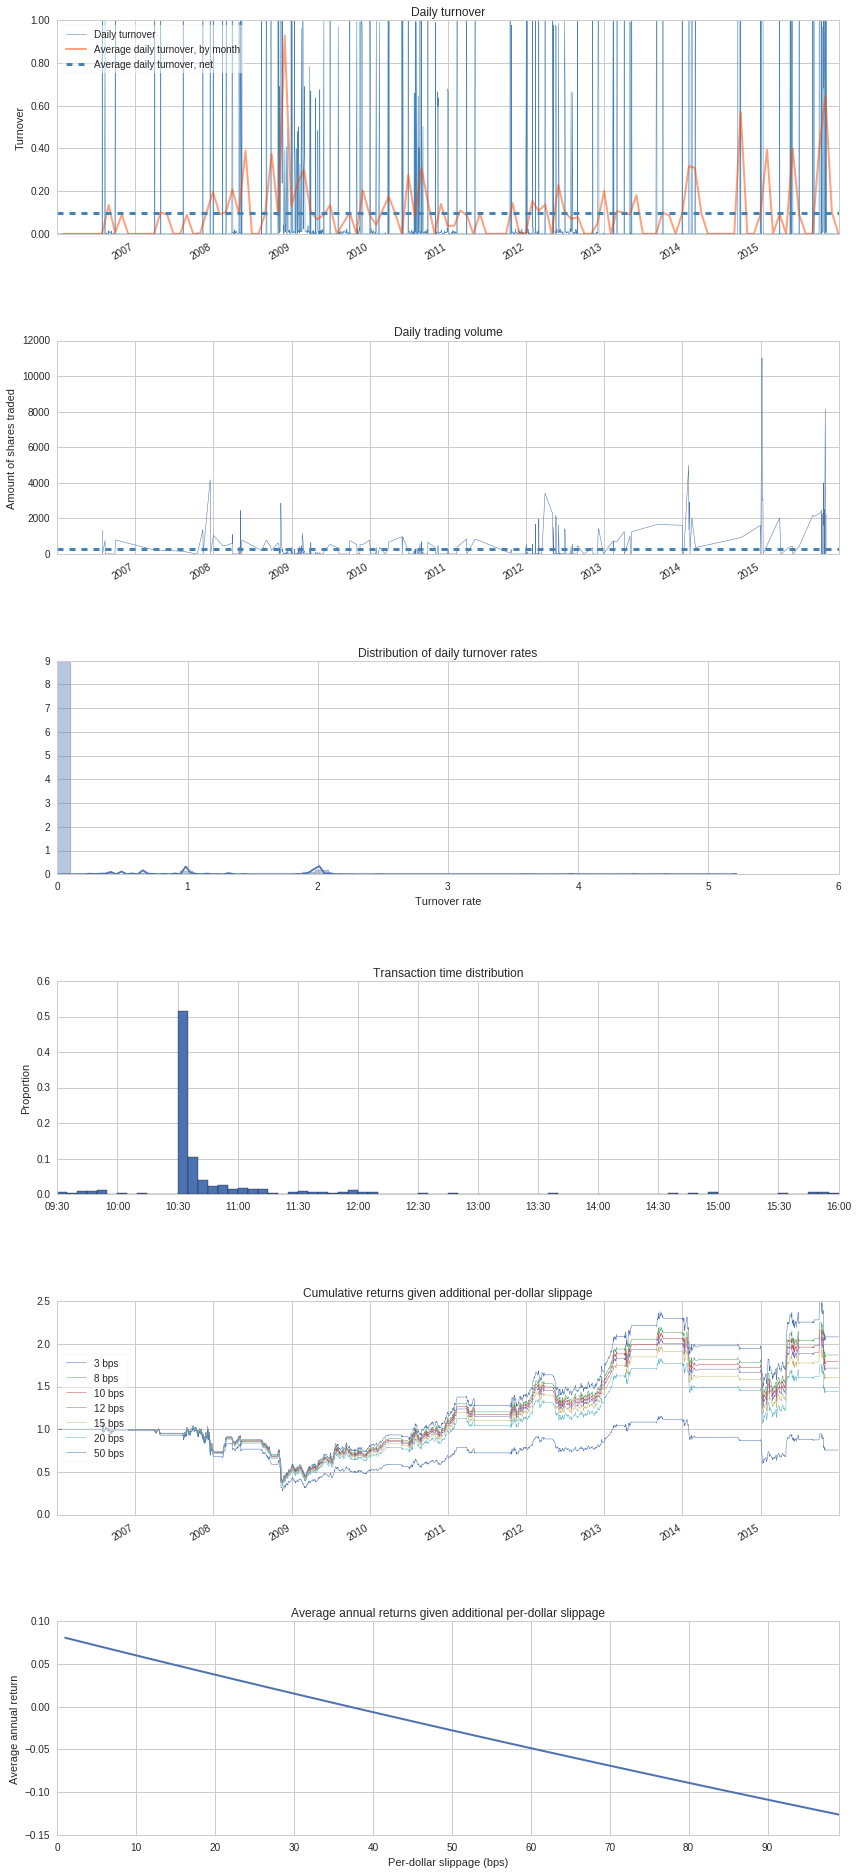

## Performance Relative to Common Risk Factors

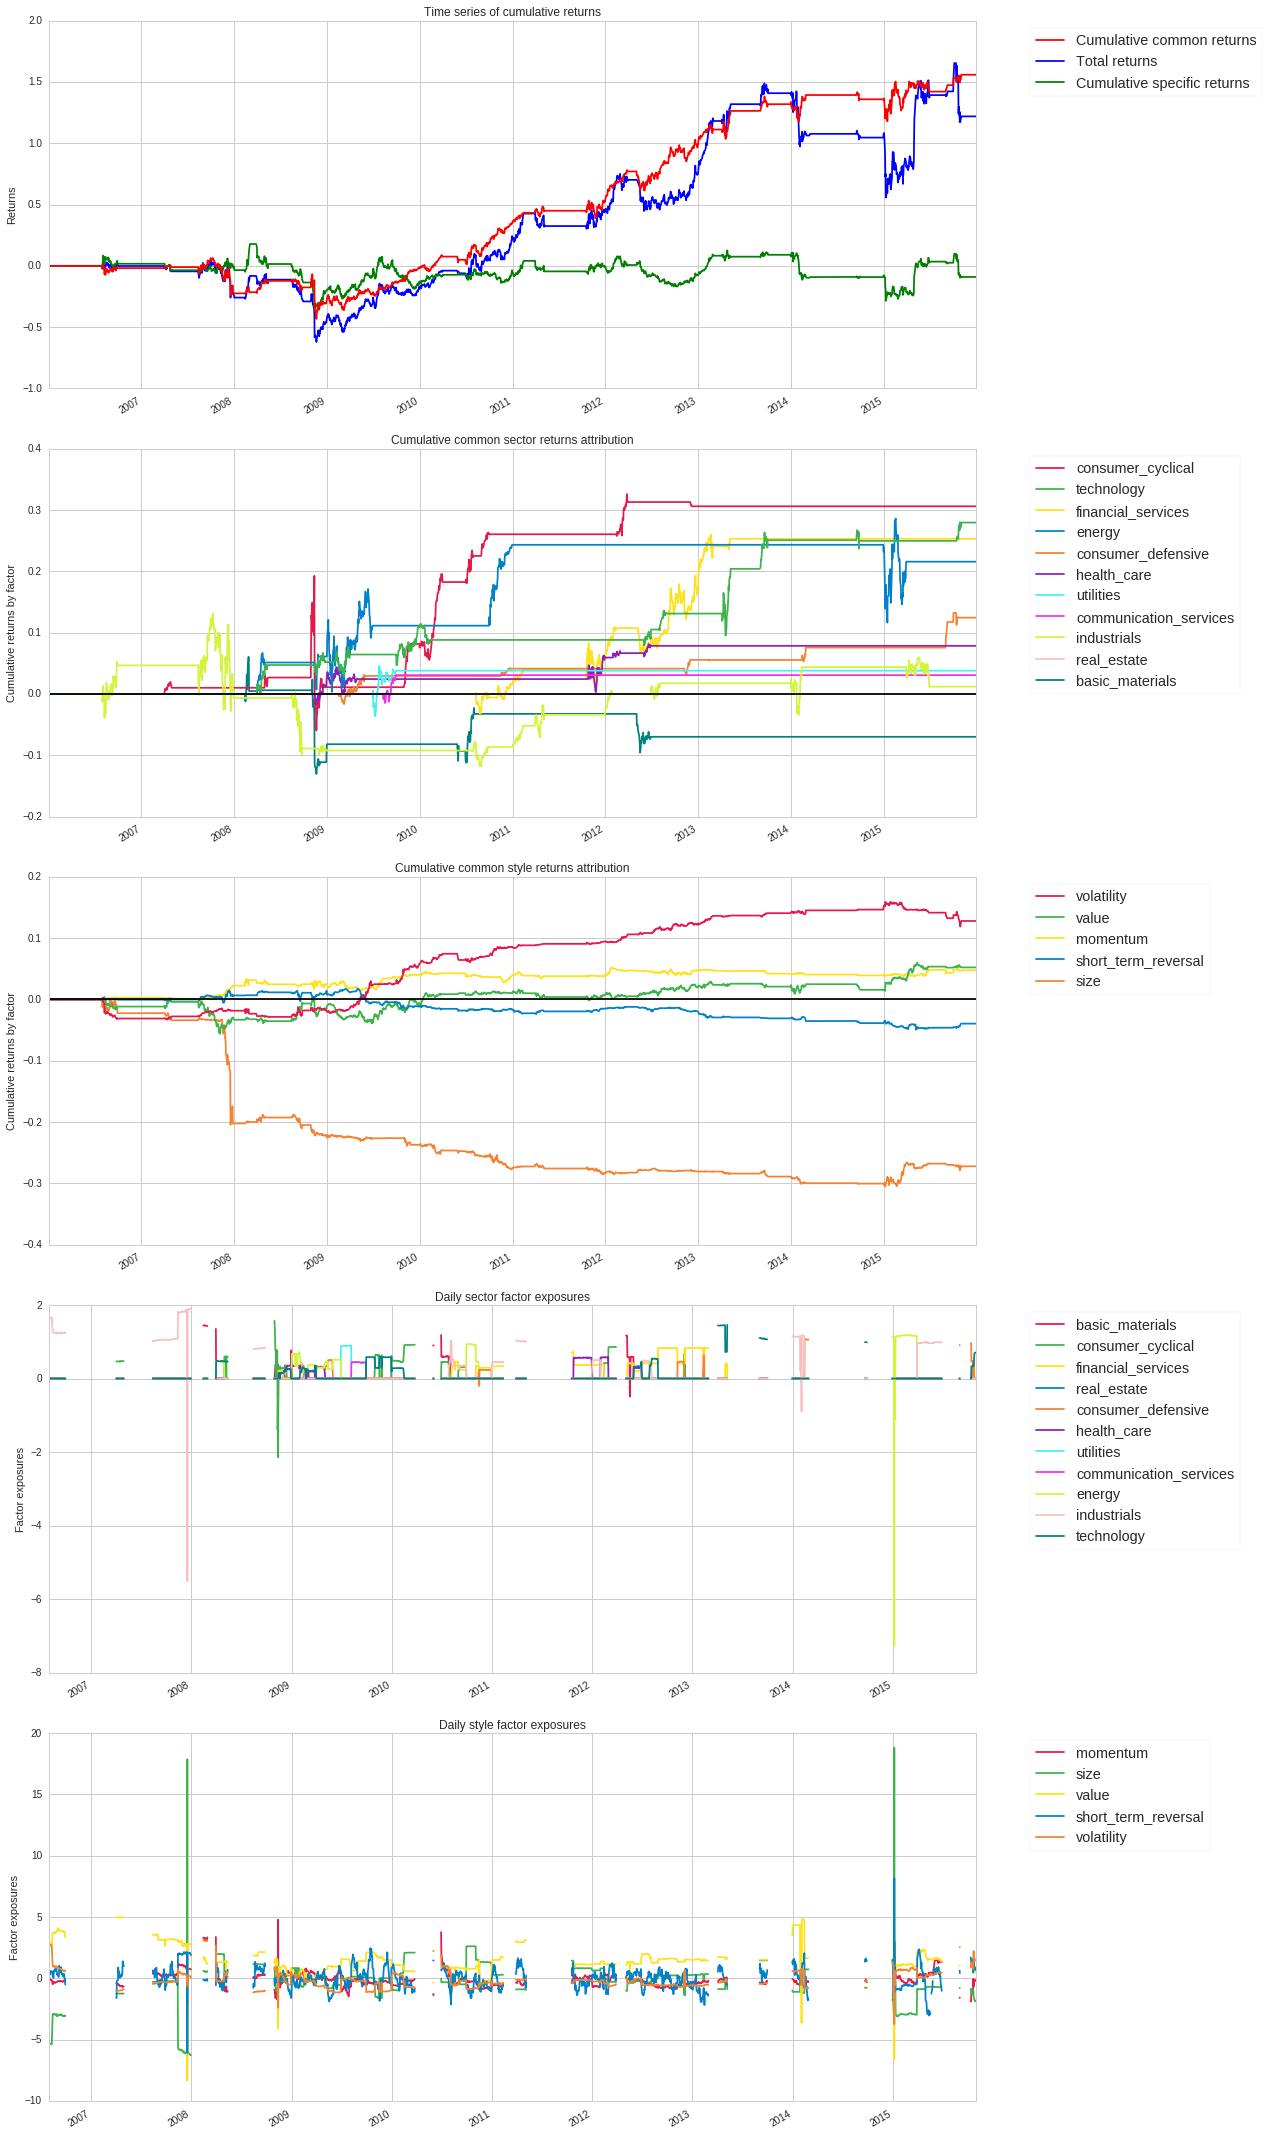

In [6]:
# The live trading start date is provided for the purposes of generating look-forward estimates. This is
# not the actual live trading start date
piotroski1.create_full_tear_sheet(slippage=0.005, benchmark_rets=benchmark_return)

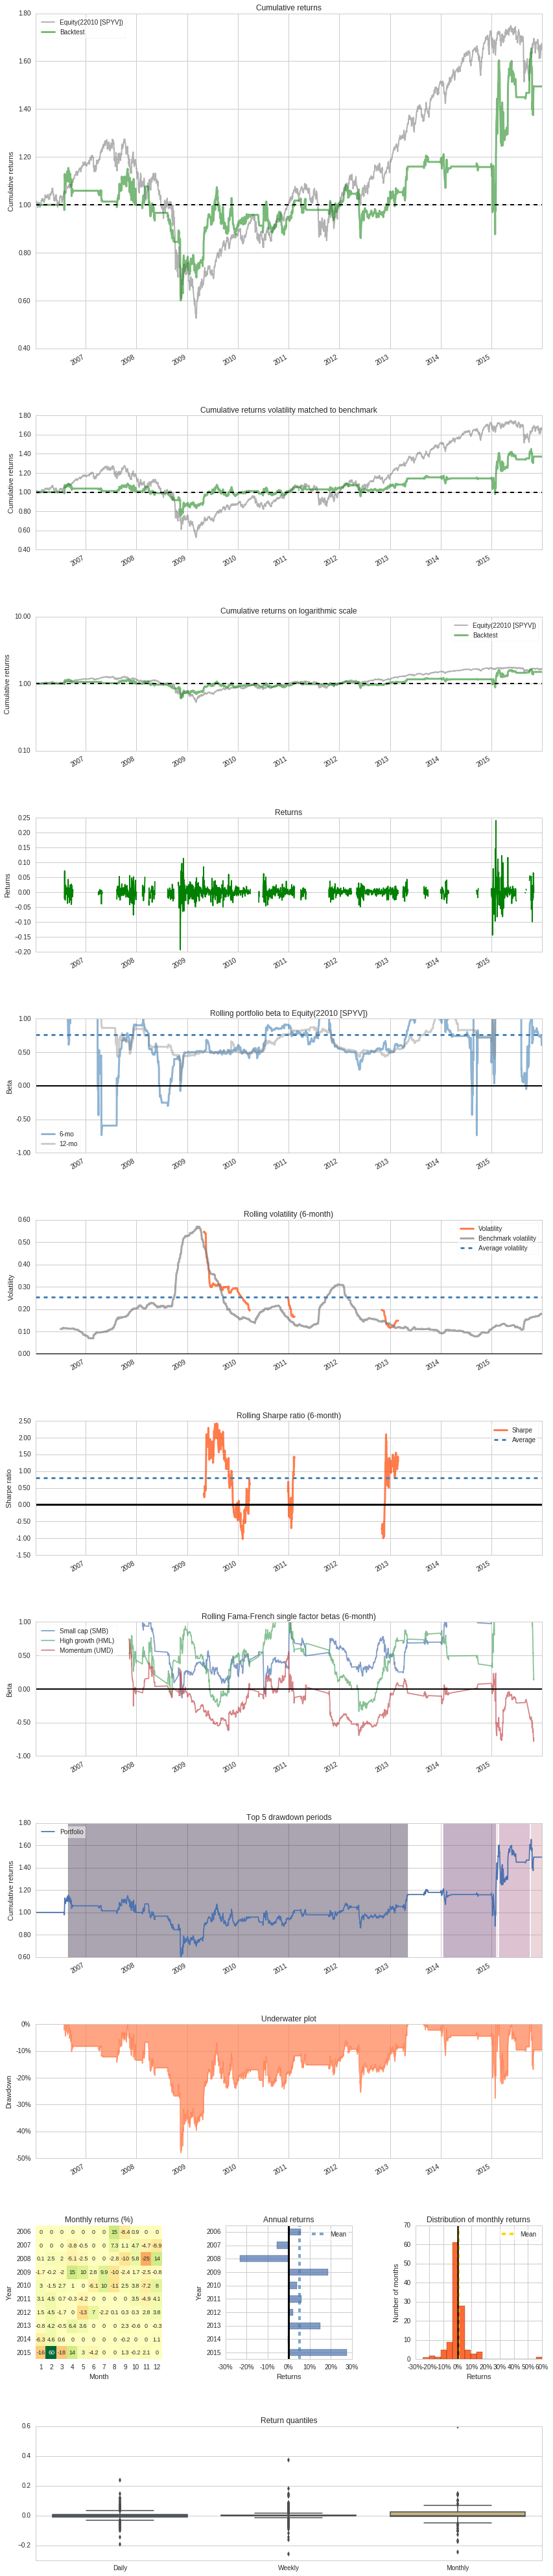

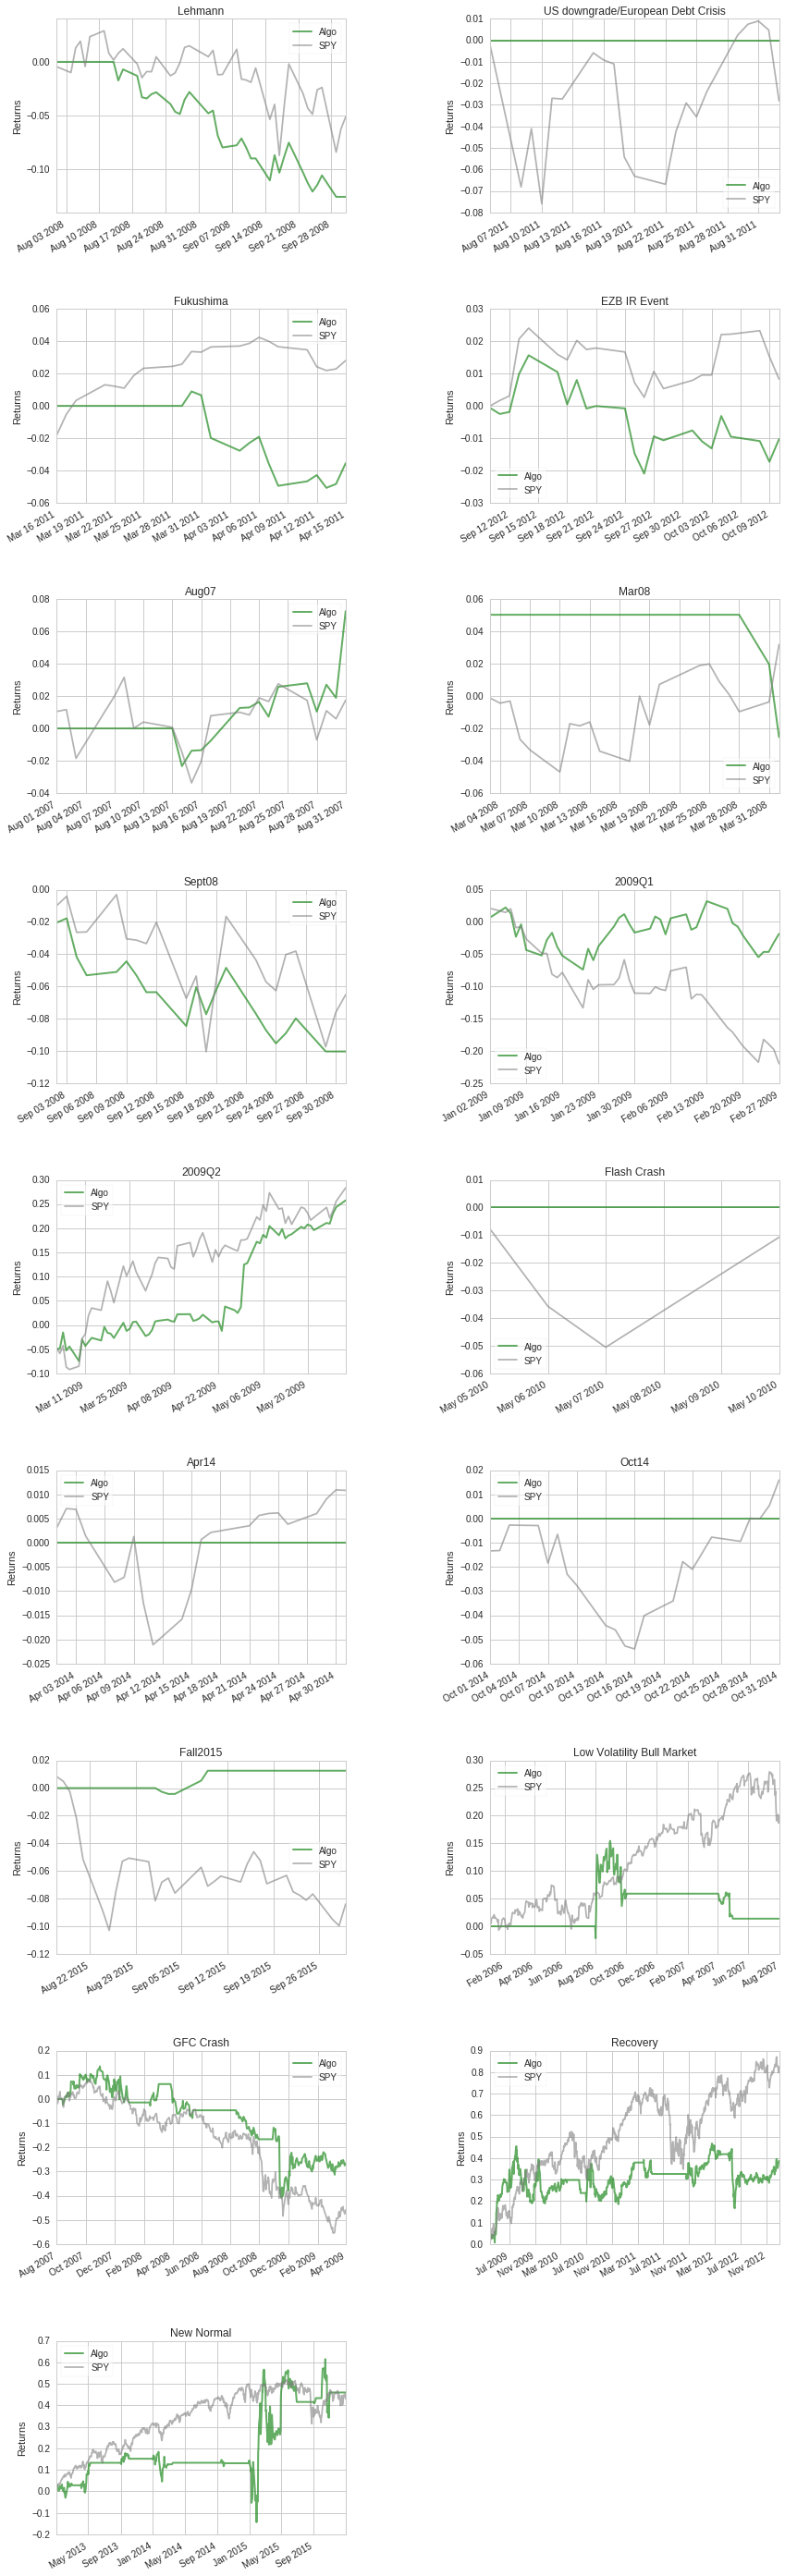

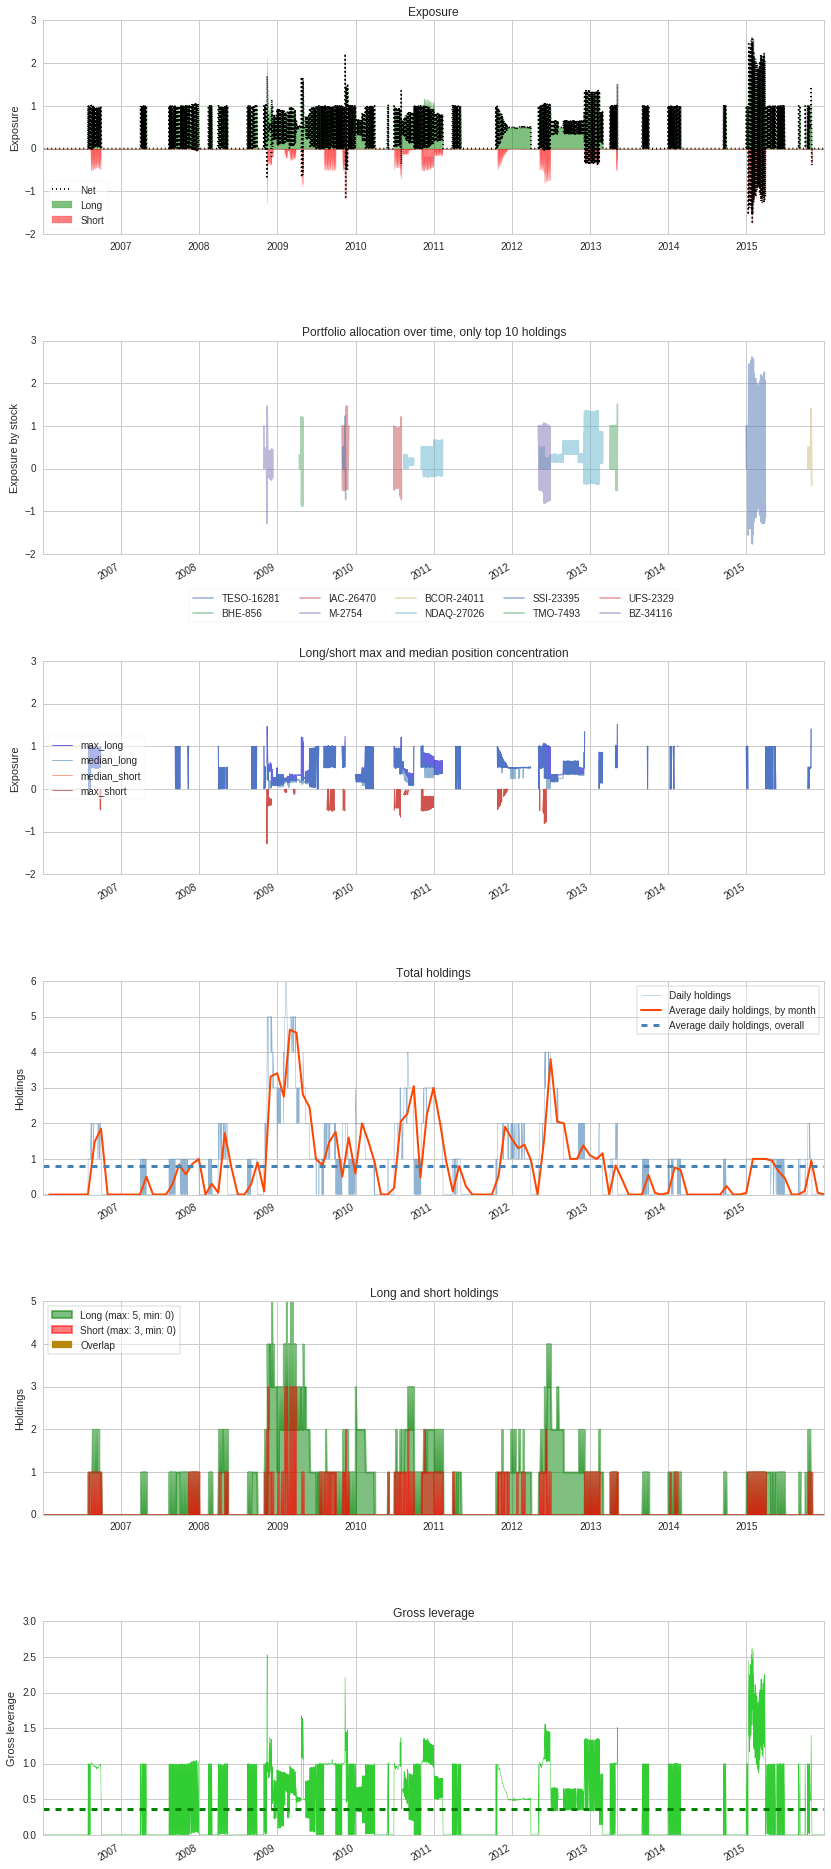

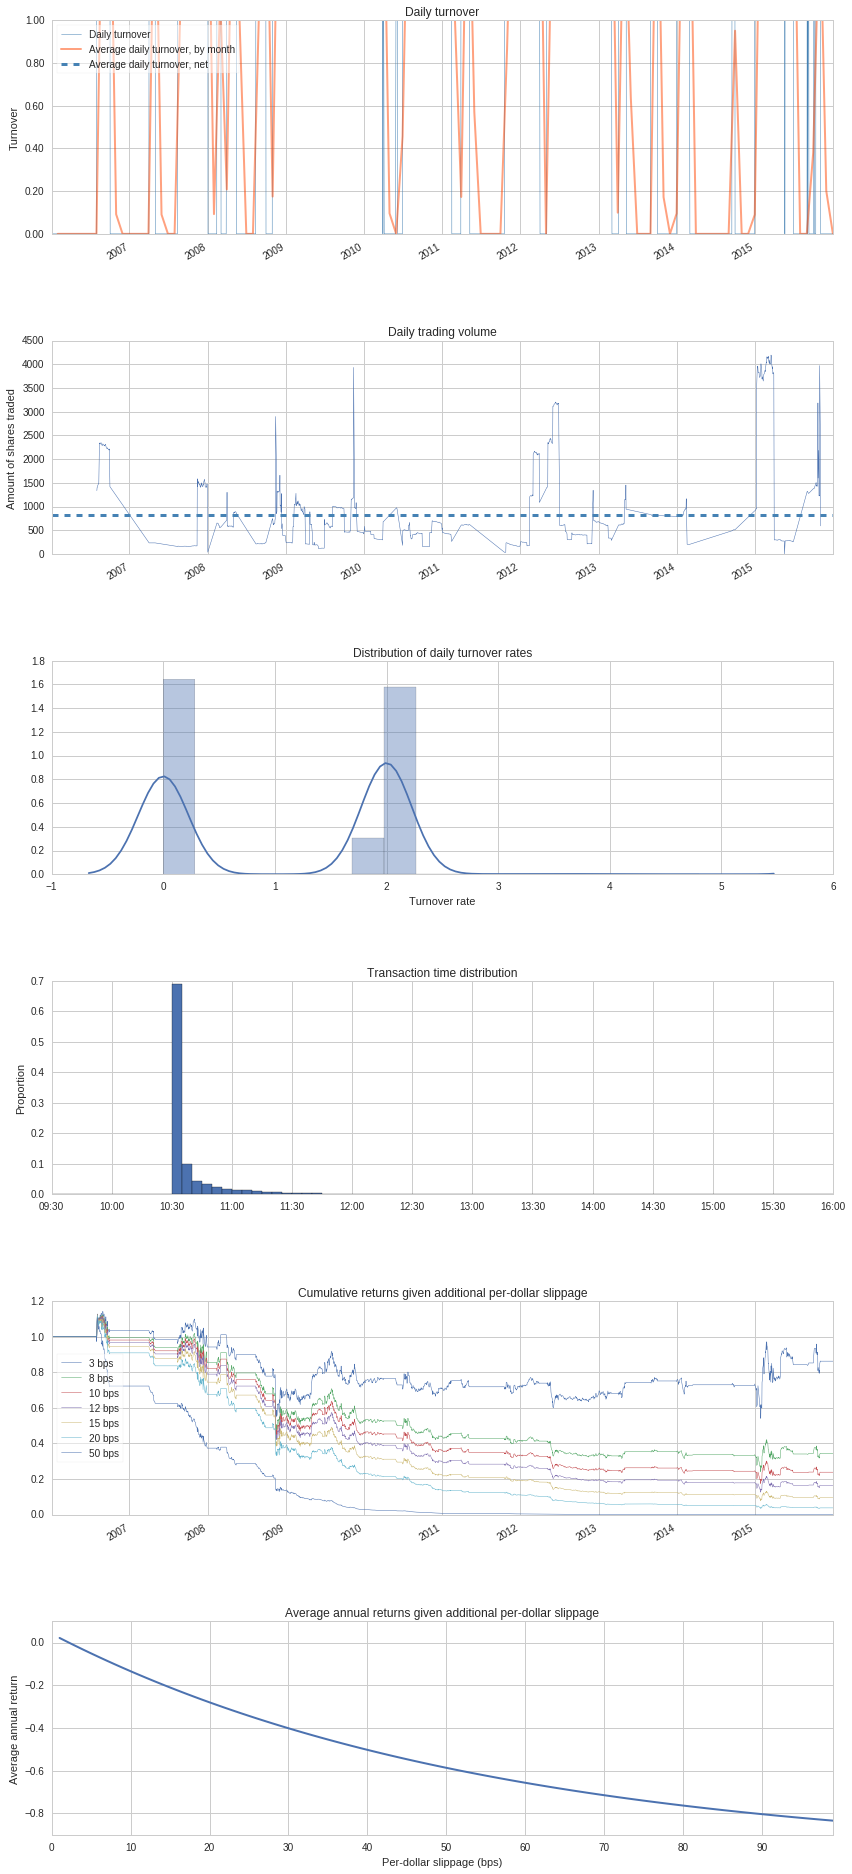

/usr/local/lib/python2.7/dist-packages/pyfolio/perf_attrib.py:611: UserWarning: This algorithm has relatively high turnover of its positions. As a result, performance attribution might not be fully accurate.

Performance attribution is calculated based on end-of-day holdings and does not account for intraday activity. Algorithms that derive a high percentage of returns from buying and selling within the same day may receive inaccurate performance attribution.

  warnings.warn(warning_msg)


## Performance Relative to Common Risk Factors

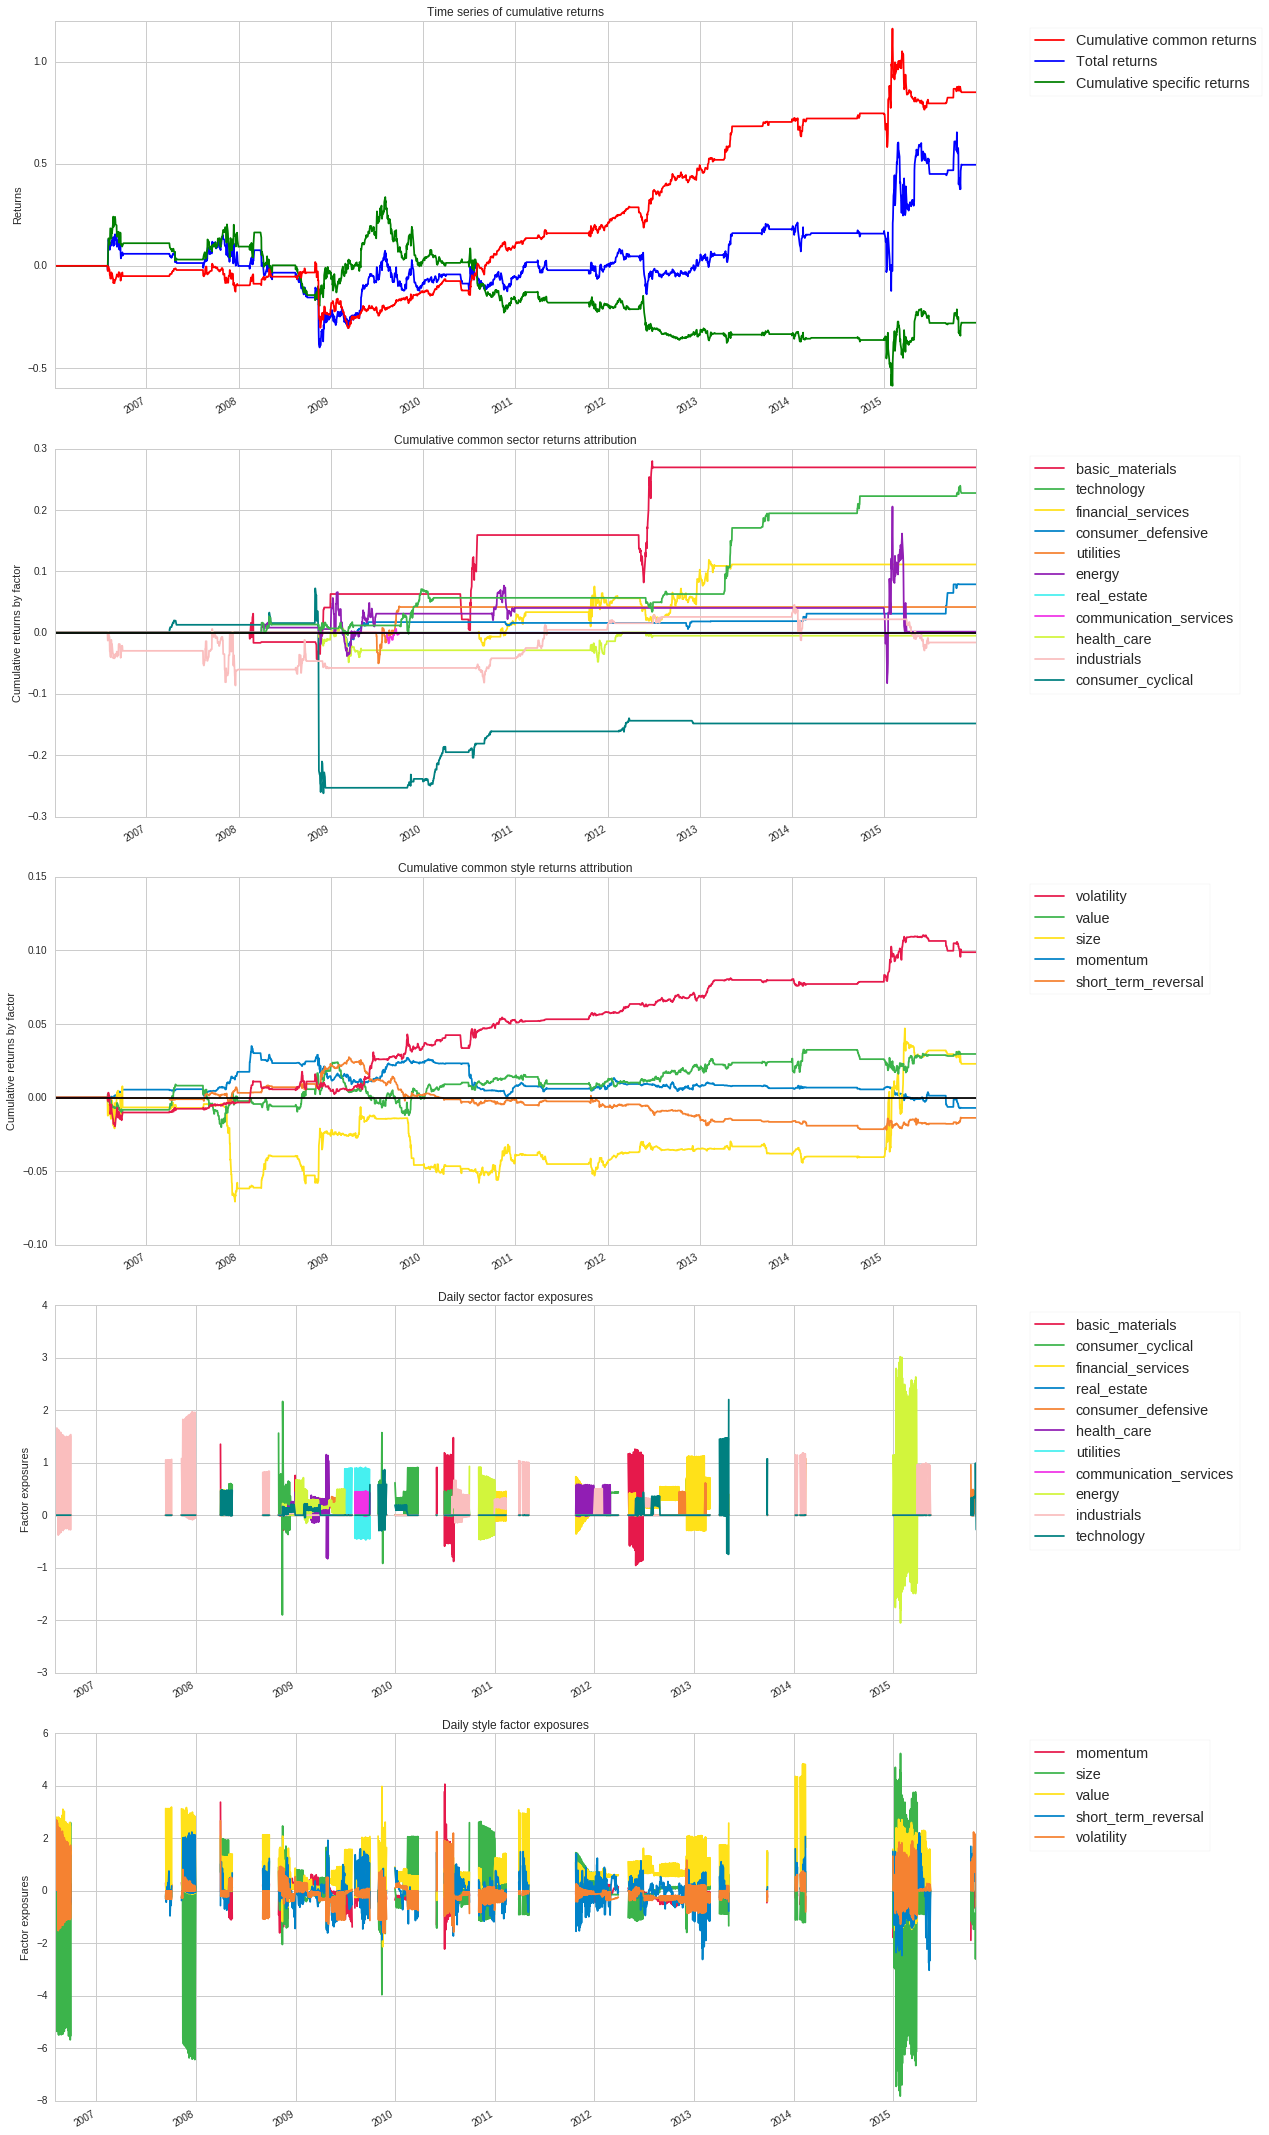

In [7]:
piotroski2.create_full_tear_sheet(slippage=0.005, benchmark_rets=benchmark_return)

The model performed poorly in out-sample backtest. This was not expected, since in in-sample tests it performed exceedingly well. Digging into the tearsheet, we found, the average number of positions throughout the backtest period is very small, i.e., manyatimes, it holds just a single position. Portfolio diversification is not optimal in this case. Compared with Piotroski3 (strategy 3) below, average numner of positions held during the backtest period is tad higher than that in strategy 2.

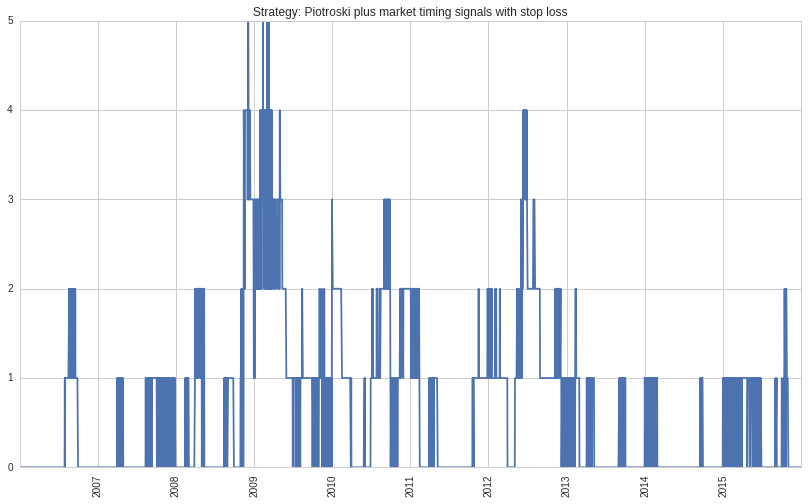

In [8]:
pos2 = piotroski2.pyfolio_positions.fillna(0)
pos2.index = pd.DatetimeIndex(pos2.index).date

pos2.iloc[:,:-1].where(cond=pos2 > 0, axis = 0).T.count().plot(label='No. Of Positions');
plt.title('Strategy: Piotroski plus market timing signals with stop loss')
plt.xticks(rotation=90)
plt.show()

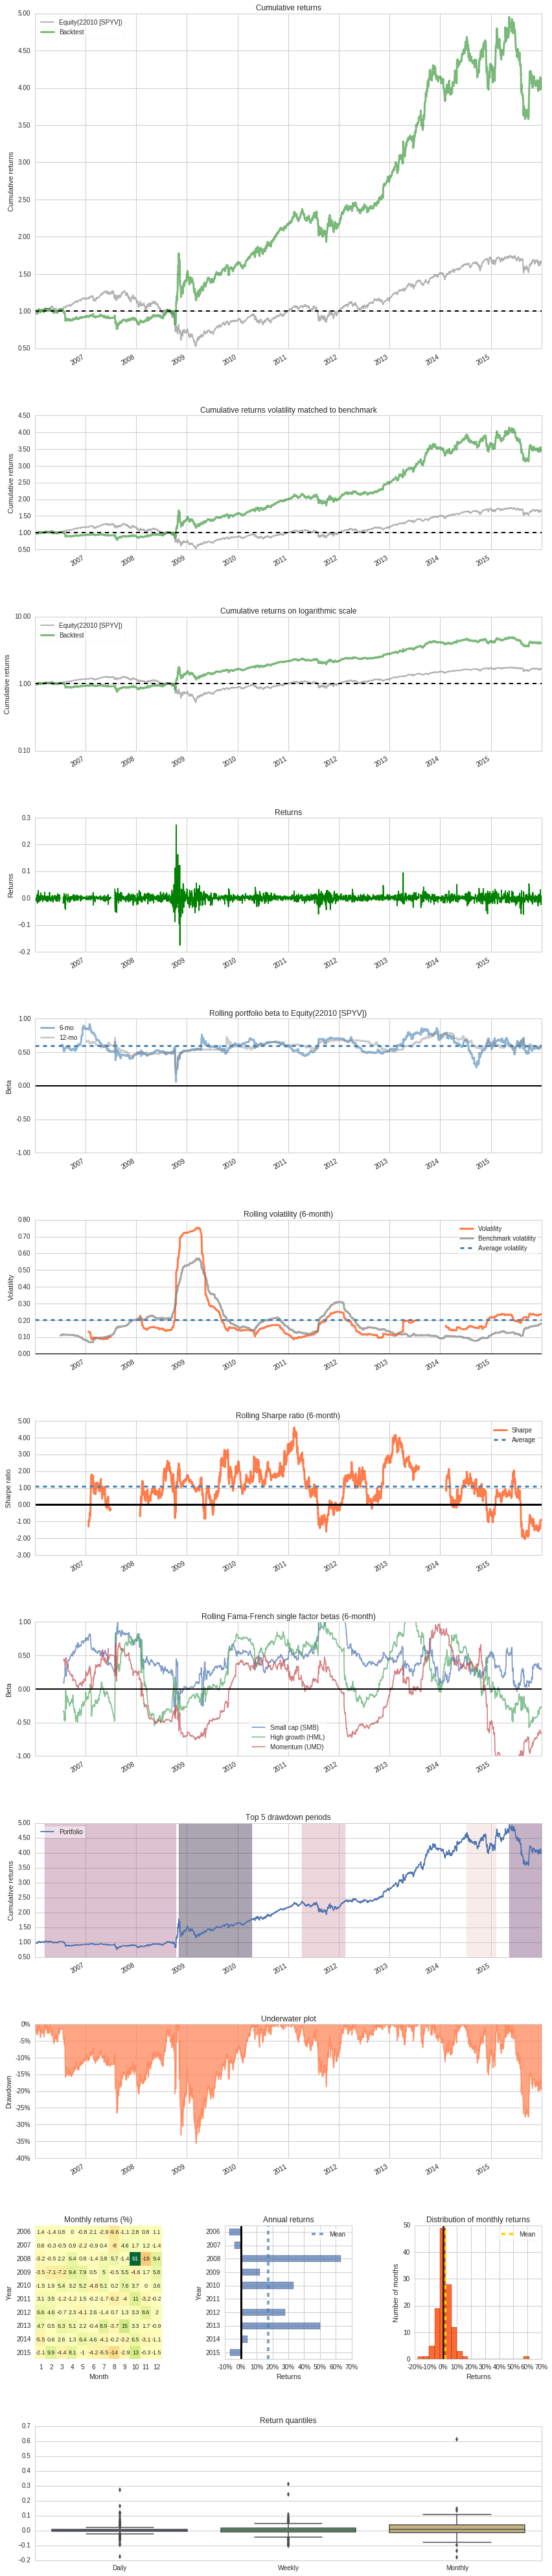

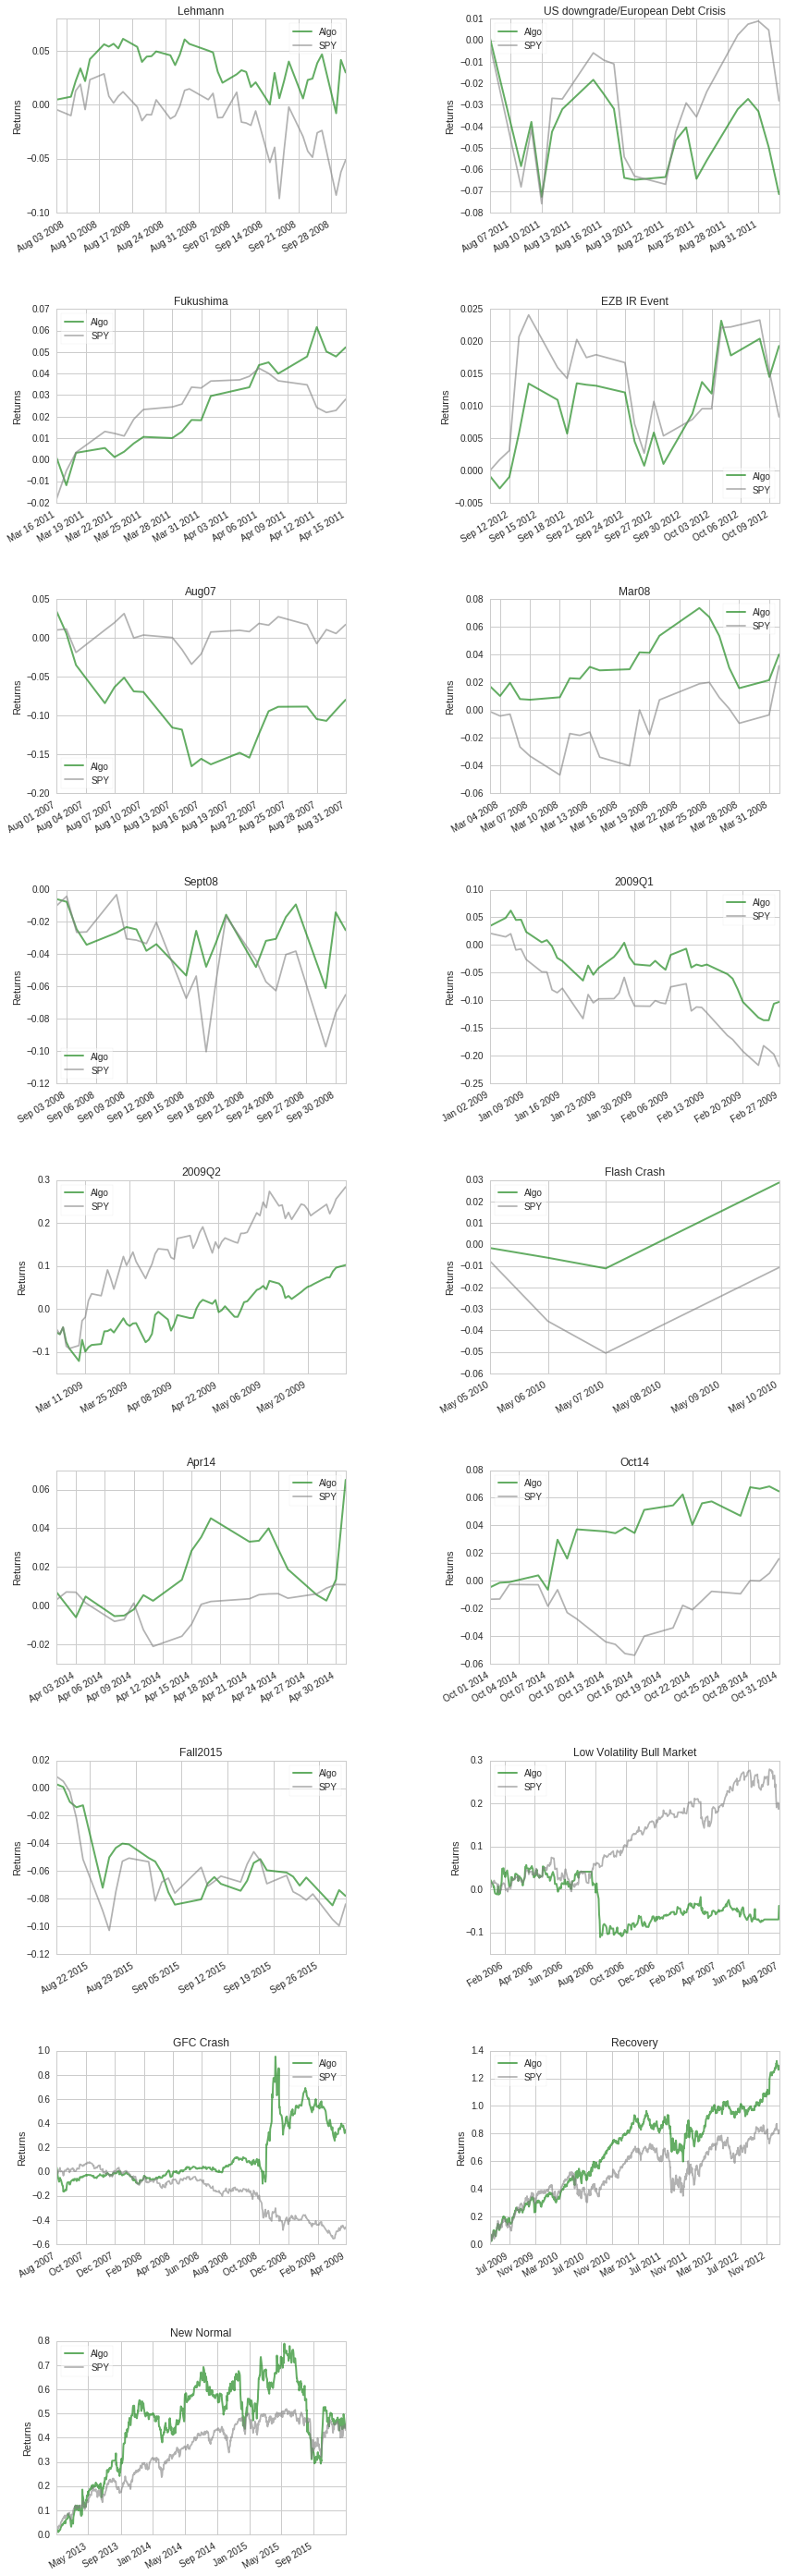

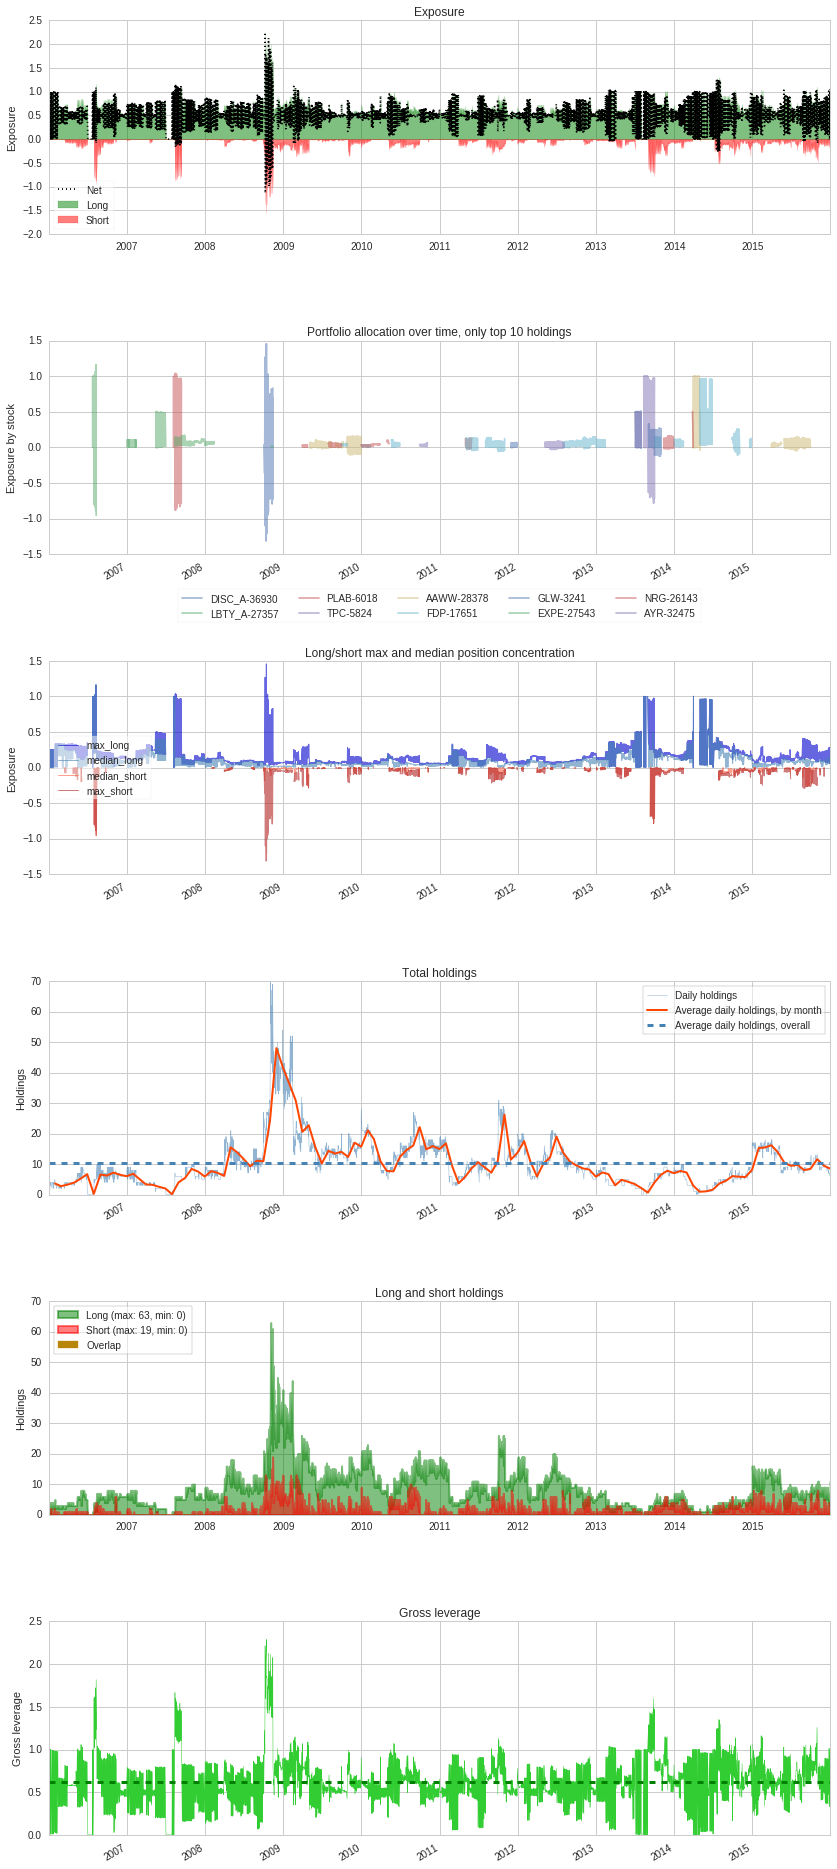

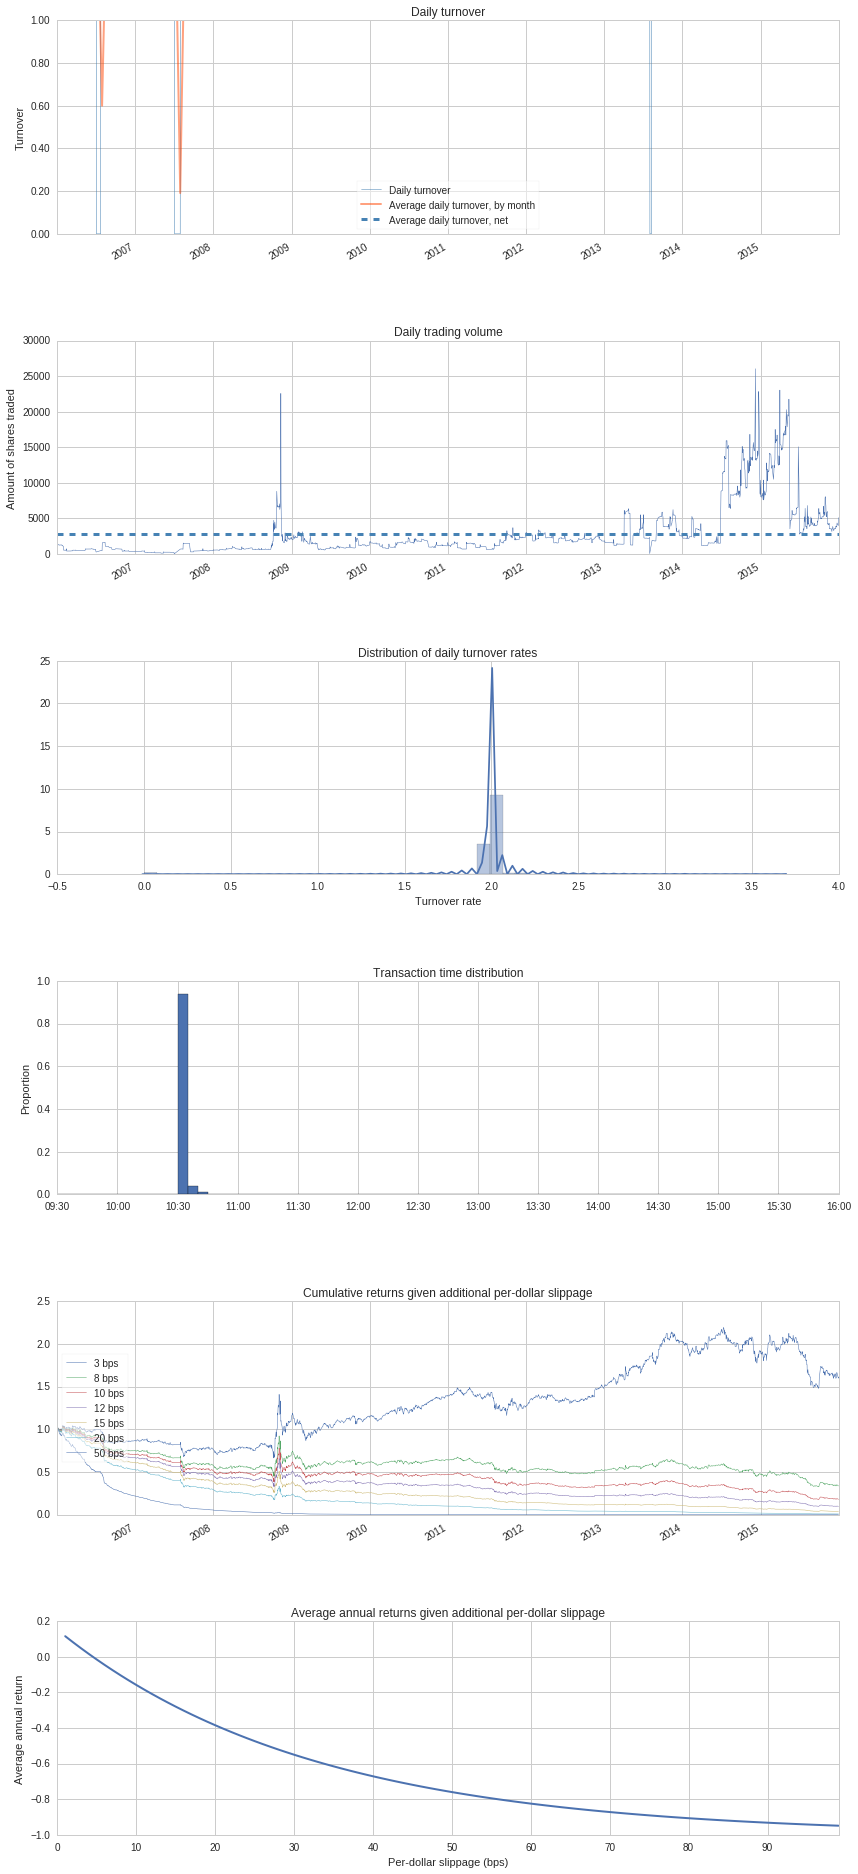

## Performance Relative to Common Risk Factors

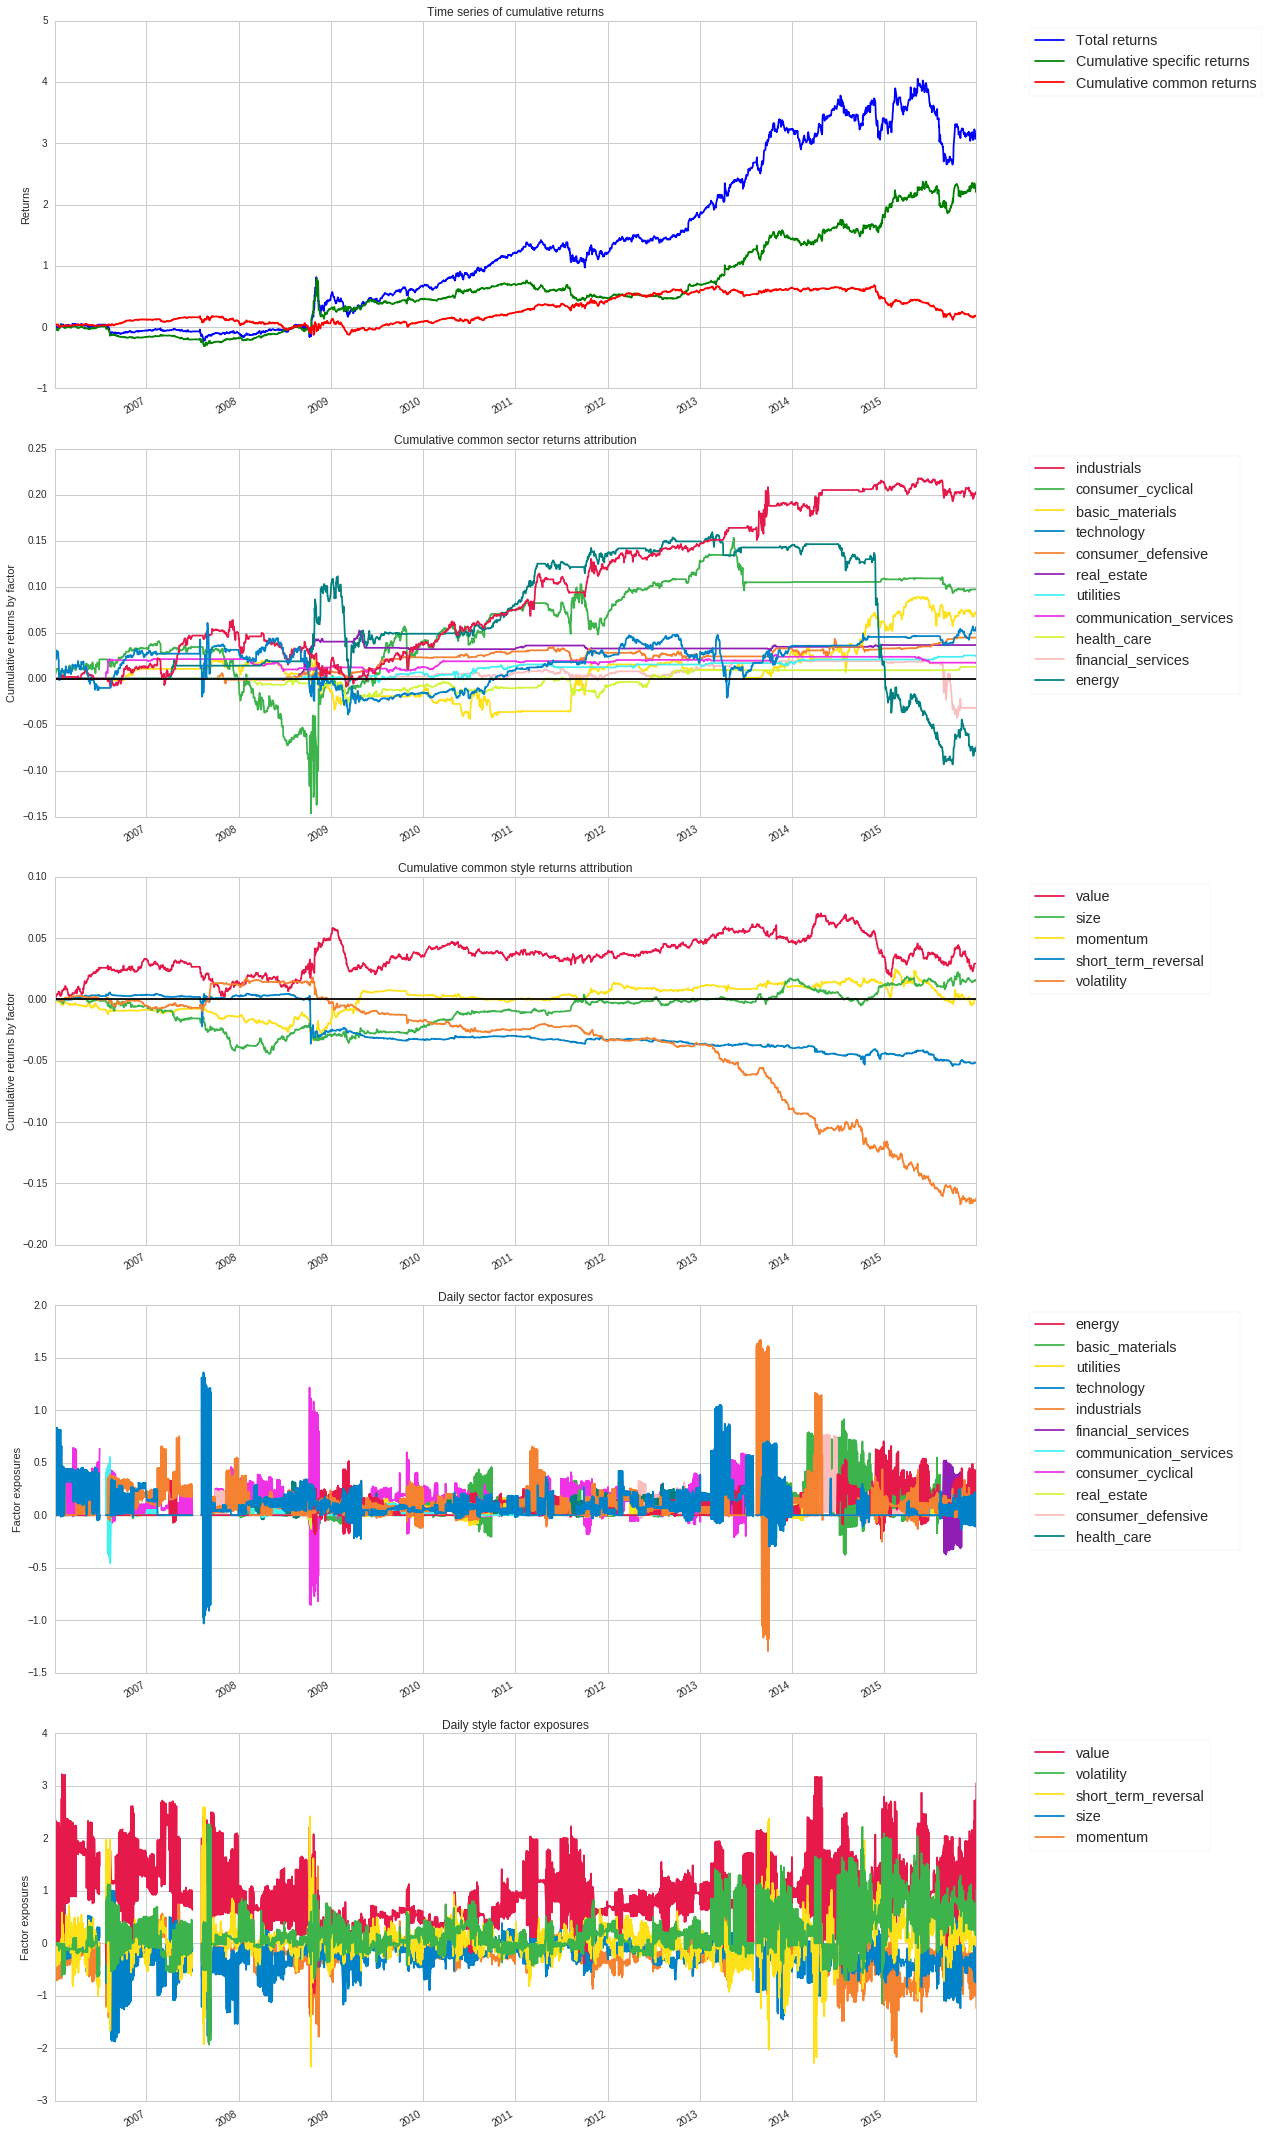

In [9]:
piotroski3.create_full_tear_sheet(benchmark_rets=benchmark_return, slippage=0.005)

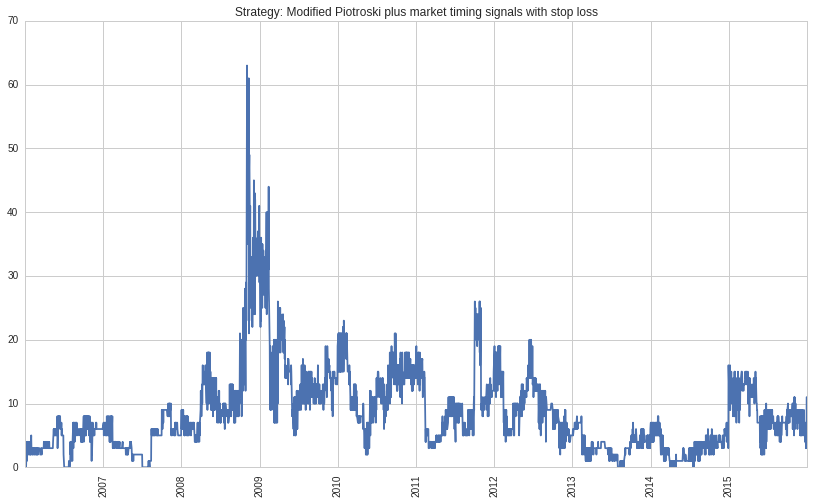

In [10]:
pos3 = piotroski3.pyfolio_positions.fillna(0)
pos3.index = pd.DatetimeIndex(pos3.index).date

pos3.iloc[:, :-1].where(cond=pos3 > 0, axis=0).T.count().plot(label='No. Of Positions')
plt.title('Strategy: Modified Piotroski plus market timing signals with stop loss')
plt.xticks(rotation=90)
plt.show()

Pyfolio Bayesian analysis documentation: https://quantopian.github.io/pyfolio/notebooks/bayesian/